In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import csv

In [2]:
# import data for training and testing from csv file 
data = pd.read_csv('train.csv', error_bad_lines=False)
data.columns = ['ID', 'Sentiment', 'Tweet']
data = data.drop(['ID'], axis=1)
data

,Sentiment,Tweet
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
5,0,or i just worry too much?
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,0,Sunny Again Work Tomorrow :-| ...
8,1,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-)


In [3]:
# get the number of positive and negative tweets 
pos_tweets = data['Sentiment'][data.Sentiment == 0]
neg_tweets = data['Sentiment'][data.Sentiment == 1]

print('Number of positve tweets are:  {}'.format(len(pos_tweets)))
print('Number of negative tweets are: {}'.format(len(neg_tweets)))
print('Total length of the data is:   {}'.format(data.shape[0]))

Number of positve tweets are:  43532
Number of negative tweets are: 56457
Total length of the data is:   99989


In [4]:
# get word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
data['wordCount'] = data['Tweet'].apply(word_count)
data

,Sentiment,Tweet,wordCount
0,0,is so sad for my APL frie...,7
1,0,I missed the New Moon trail...,6
2,1,omg its already 7:30 :O,5
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,25
4,0,i think mi bf is cheating on me!!! ...,9
5,0,or i just worry too much?,6
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,2
7,0,Sunny Again Work Tomorrow :-| ...,7
8,1,handed in my uniform today . i miss you ...,10
9,1,hmmmm.... i wonder how she my number @-),8


In [5]:
# plot word count distribution for both positive and negative sentiments against frequency of tweets  
import matplotlib.pyplot as plt

x = data['wordCount'][data.Sentiment == 1]
y = data['wordCount'][data.Sentiment == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
g = plt.hist([x, y], color=['g','y'], alpha=0.8, label=['positive','negative'])
plt.legend(loc='upper right')

In [6]:
# split 33% data for test from the total data 

from sklearn.model_selection import train_test_split

X = data['Tweet']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# get the most common words in training dataset 
from collections import Counter

all_words = []
for line in list(X_train):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
        
Counter(all_words).most_common(10)

[('i', 32761),
 ('the', 19917),
 ('to', 19641),
 ('you', 15683),
 ('a', 14721),
 ('and', 10572),
 ('it', 9450),
 ('my', 9124),
 ('for', 8247),
 ('is', 7829)]

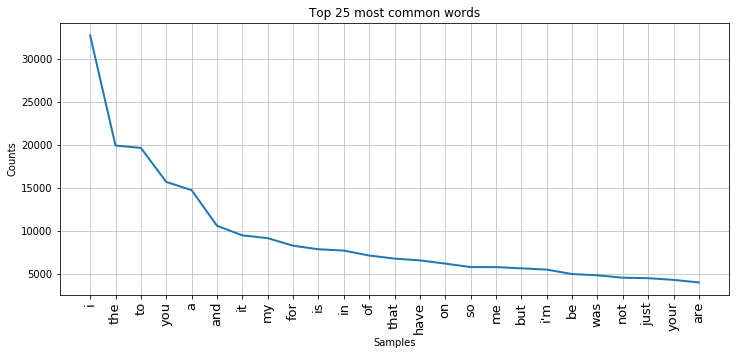

In [8]:
# plot the word frequency distribution of the first few words
import nltk

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

In [9]:
list = []
for i in range(1, len(X_train)+1):
    list.append(i)

In [10]:
# make the dataframe of training data 
data_train = pd.DataFrame()
data_train['Sentiment'] = y_train
data_train['Tweet'] = X_train
data_train = data_train.set_index([list])

In [11]:
data_train

,Sentiment,Tweet
1,1,@alekzalatte latte! Welcome to Twitter!!!!!!! ...
2,0,@Chaoticshimmer if it was that Paul I would ha...
3,0,@aciel Hihihi... udah nyoba UberTwitter belum?...
4,0,"@Bleakey Dude, it's so true. And the little as..."
5,0,@barbra77 work nights in a 5* private apartmen...
6,0,@BostonTweet all these awesome free things and...
7,1,@brod3740 Absolutely! If they can keep it clos...
8,0,@ArinIsLove college business has gotten me bus...
9,0,@AceMas21 certainly is more pigeon snorkers??...
10,1,"@amandabynes I already have, but thanks for th..."


In [12]:
list2 = []
for i in range(1, len(X_test)+1):
    list2.append(i)

In [13]:
# make the dataframe of test data 
data_test = pd.DataFrame()
data_test['Sentiment'] = y_test
data_test['Tweet'] = X_test
data_test = data_test.set_index([list2])

In [14]:
data_test

,Sentiment,Tweet
1,1,@Allieandra wheeee!
2,1,@a02toyota Thank you for the FF! Good to meet ya
3,0,@ electricbath Eewwww. Gross! So sorry hayward...
4,1,"#followfriday - I'm a little late, but here's ..."
5,1,"#icanhelp in shopping (deals), personal assist..."
6,0,broken hearts will heal with time...
7,0,..I've already listened to all the S4 commenta...
8,1,&quot;Everybody make mistakes.&quot; I'm gonna...
9,1,"#I Believe...that if you smile at someone, fri..."
10,0,@andreacFOD I think I'm done at twitterland to...


In [15]:
# helper function to clean tweets
import re 
from string import punctuation

def processTweet(tweet):
    # remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;','', tweet)
    # convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # remove tickers
    tweet = re.sub(r'\$\w','',tweet)
    # convert tweet to lowercase
    tweet = tweet.lower()
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*','',tweet)
    # remove hashtags
    tweet = re.sub(r'#\w*','',tweet)
    # remove punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'['+ punctuation.replace('@', '') +']+', ' ', tweet)
    # remove words with two or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b','', tweet)
    # remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

In [16]:
# clean traing and test dataframe's text column 
data_train['Tweet'] = data_train['Tweet'].apply(processTweet)
data_test['Tweet'] = data_test['Tweet'].apply(processTweet)

In [17]:
data_train

,Sentiment,Tweet
1,1,latte welcome twitter yay
2,0,was that paul would have ass already line see ...
3,0,hihihi udah nyoba ubertwitter belum atau tweet...
4,0,dude true and the little asian ladies always r...
5,0,work nights private apartments leeds yorkshire...
6,0,all these awesome free things and desire outsi...
7,1,absolutely they can keep close they have chanc...
8,0,college business has gotten busy while school ...
9,0,certainly more pigeon snorkers lol
10,1,already have but thanks for the reminder amand...


In [18]:
data_test

,Sentiment,Tweet
1,1,wheeee
2,1,thank you for the good meet
3,0,@ electricbath eewwww gross sorry hayward hate...
4,1,little late but here special shoutout for missus
5,1,shopping deals personal assistant event planni...
6,0,broken hearts will heal with time
7,0,already listened all the commentary except the...
8,1,everybody make mistakes gonna get some sleep b...
9,1,believe that you smile someone friend stranger...
10,0,think done twitterland too will tweet david on...


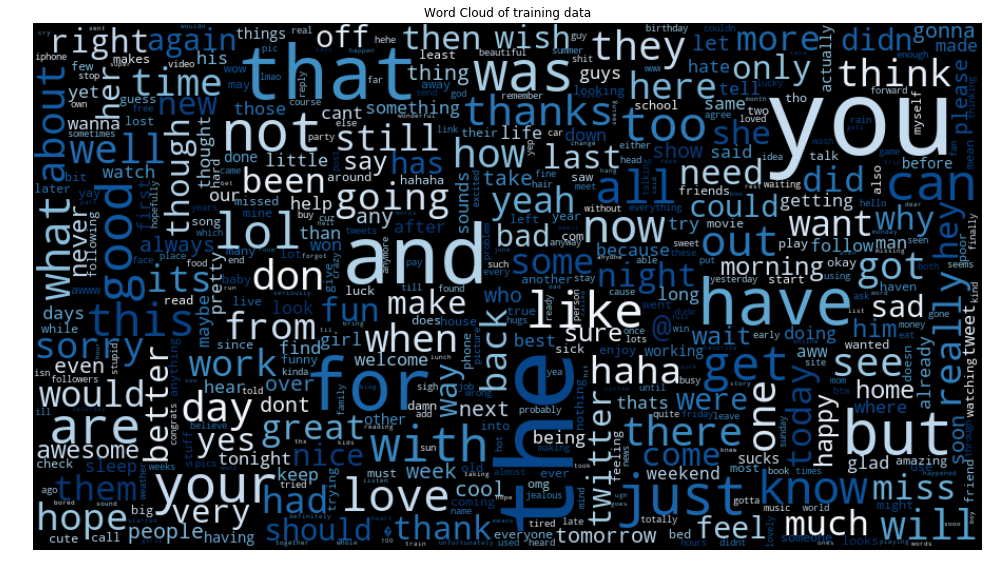

In [19]:
from wordcloud import WordCloud

# split sentences to get individual words
all_words = []
for line in data_train['Tweet']:
    words = line.split()
    for word in words:
        all_words.append(word.lower())
        
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900, height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues', normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.title('Word Cloud of training data')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

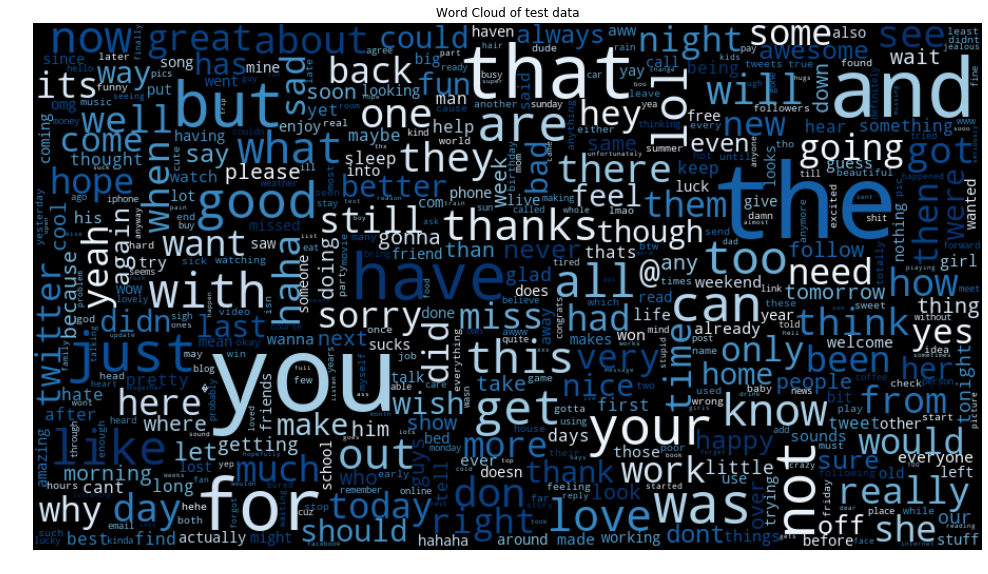

In [20]:
from wordcloud import WordCloud

# split sentences to get individual words
all_words = []
for line in data_test['Tweet']:
    words = line.split()
    for word in words:
        all_words.append(word.lower())
        
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900, height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues', normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.title('Word Cloud of test data')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\5559\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
# show stop words examples
stop_words = stopwords.words('english') # Show some stop words
' , '.join(stop_words)[:200], len(stop_words)

("i , me , my , myself , we , our , ours , ourselves , you , you're , you've , you'll , you'd , your , yours , yourself , yourselves , he , him , his , himself , she , she's , her , hers , herself , it ",
 179)

In [23]:
from string import punctuation
import string
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in raw_text if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]


In [24]:
# data_train['Tokens'] = data_train['Tweet'].apply(processTweet)
data_train['Tokens'] = data_train['Tweet'].apply(text_process)
# data_test['Tweet'] = data_test['Tweet'].apply(processTweet)

# data_train['tokens'] = data_train['Tweet'].apply(text_process)
data_train

,Sentiment,Tweet,Tokens
1,1,latte welcome twitter yay,"[latte, welcome, twitter, yay]"
2,0,was that paul would have ass already line see ...,"[paul, would, ass, already, line, see, sick, g..."
3,0,hihihi udah nyoba ubertwitter belum atau tweet...,"[hihihi, udah, nyoba, ubertwitter, belum, atau..."
4,0,dude true and the little asian ladies always r...,"[dude, true, little, asian, ladies, always, ru..."
5,0,work nights private apartments leeds yorkshire...,"[work, nights, private, apartments, leeds, yor..."
6,0,all these awesome free things and desire outsi...,"[awesome, free, things, desire, outside, muck]"
7,1,absolutely they can keep close they have chanc...,"[absolutely, keep, close, chance, home, advant..."
8,0,college business has gotten busy while school ...,"[college, business, gotten, busy, school, star..."
9,0,certainly more pigeon snorkers lol,"[certainly, pigeon, snorkers, lol]"
10,1,already have but thanks for the reminder amand...,"[already, thanks, reminder, amanda, case, forgot]"


In [25]:
data_train['Tokens'].head(10)

1                        [latte, welcome, twitter, yay]
2     [paul, would, ass, already, line, see, sick, g...
3     [hihihi, udah, nyoba, ubertwitter, belum, atau...
4     [dude, true, little, asian, ladies, always, ru...
5     [work, nights, private, apartments, leeds, yor...
6        [awesome, free, things, desire, outside, muck]
7     [absolutely, keep, close, chance, home, advant...
8     [college, business, gotten, busy, school, star...
9                    [certainly, pigeon, snorkers, lol]
10    [already, thanks, reminder, amanda, case, forgot]
Name: Tokens, dtype: object

In [26]:
# def remove_words(word_list):
#     remove = ['Samsung']
#     return [w for w in word_list if w not in remove]
# data_train['Tokens'] = data_train['Tokens'].apply(remove_words)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# vetorize
bow_transformer = CountVectorizer(analyzer=text_process).fit(data_train['Tweet'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))

40072


In [34]:
# sample tweet
sample = data_train['Tweet'][7]
print(sample)

# vector representation
bow_sample = bow_transformer.transform([sample])
print(bow_sample)

absolutely they can keep close they have chance have the home advantage 
  (0, 1192)	1
  (0, 1494)	1
  (0, 6897)	1
  (0, 7680)	1
  (0, 16748)	1
  (0, 19258)	1


In [38]:
# # vetorize
# bow_transformer = CountVectorizer(analyzer=text_process).fit(data_train['Tokens'])
# # print total number of vocab words
# print(len(bow_transformer.vocabulary_))

In [39]:
# sample = data_train['Tokens'][7]
# print(sample)

# # vector representation
# bow_sample = bow_transformer.transform([sample])
# print(bow_sample)

In [40]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(data_train['Tweet'])

# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (66992, 62492)
Amount of Non-Zero occurences:  218459


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }

# do 10-fold cross validation for each of the 8 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)

# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  5.7min finished



Best Model: 0.707890 using {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.692142 Stdev:(0.004451) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.707890 Stdev:(0.003178) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.690366 Stdev:(0.003960) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.699949 Stdev:(0.003566) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.691889 Stdev:(0.004034) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.707577 Stdev:(0.004058) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.685037 Stdev:(0.003829) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.694949 Stdev:(0.003938) with: {'bow__ngram_range'

In [42]:
from sklearn.externals import joblib
# save best model to current working directory
joblib.dump(grid, "model/twitter_sentiment.pkl")

['twitter_sentiment.pkl']

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.externals import joblib
# load from file and predict the sentiment
model_NB = joblib.load("model/twitter_sentiment.pkl" )

# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

c:\users\5559\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.3 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\5559\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\5559\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.20.3 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\5559\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator Pipeli

accuracy score:  0.7140043034215232


confusion matrix: 
 [[ 9069  5401]
 [ 4036 14491]]


             precision    recall  f1-score   support

          0       0.69      0.63      0.66     14470
          1       0.73      0.78      0.75     18527

avg / total       0.71      0.71      0.71     32997



In [39]:
from sklearn.externals import joblib
# Load trained Model
model_NaiveBayes = joblib.load("model/twitter_sentiment.pkl")

# Sample String
str = "bad phone"
p = model_NaiveBayes.predict([str])
if p[0] == 0:
    print("Negative")
else:
    print("Positive")

Negative


In [28]:
# Training model using CNN and comparing accuracy
import tensorflow as tf
if tf.test.is_gpu_available():
    # GPU
    BATCH_SIZE = 128 # Number of examples used in each iteration
    EPOCHS = 3 # Number of passes through entire dataset
    VOCAB_SIZE = 50000 # Size of vocabulary dictionary
    MAX_LEN = 100 # Max length of review (in words)
    EMBEDDING_DIM = 40 # Dimension of word embedding vector

# Hyperparams for CPU training
else:
    # CPU
    BATCH_SIZE = 32
    EPOCHS = 3
    VOCAB_SIZE = 41000
    MAX_LEN = 50
    EMBEDDING_DIM = 40

In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
# Creating Feature Vector and padding to make all the input vectors of same size 
data_train['Sentiment_CNN']=data_train['Sentiment']
data_train['Tweet_CNN'] = data_train['Tweet']
data_test['Sentiment_CNN']=data_test['Sentiment']
data_test['Tweet_CNN'] = data_test['Tweet']
data_tokenizer = Tokenizer(num_words = VOCAB_SIZE)
data_tokenizer.fit_on_texts(data_train['Tweet_CNN'].values)
data_train.head()

x_train_seq = data_tokenizer.texts_to_sequences(data_train['Tweet_CNN'].values)
x_test_seq = data_tokenizer.texts_to_sequences(data_test['Tweet_CNN'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_test = sequence.pad_sequences(x_test_seq, maxlen=MAX_LEN, padding="post", value=0)

Y_train, Y_test = data_train['Sentiment'].values, data_test['Sentiment'].values


data_train['Sentiment'].values[0]
x_train[0]

Using TensorFlow backend.


array([7622,  173,   75,  223,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [30]:
# Model Parameters 
NUM_FILTERS = 300
KERNEL_SIZE = 4
HIDDEN_DIMS = 300

In [31]:
# Building CNN model
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Conv1D, Dropout, Activation

print("Building Model!")
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())


model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Building Model!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 40)            1640000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 47, 300)           48300     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0    

In [32]:
# train CNN a model
model.fit(x_train, Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

Train on 60292 samples, validate on 6700 samples
Epoch 1/3
 - 112s - loss: 0.5322 - acc: 0.7279 - val_loss: 0.4920 - val_acc: 0.7584
Epoch 2/3
 - 110s - loss: 0.4173 - acc: 0.8080 - val_loss: 0.5155 - val_acc: 0.7496
Epoch 3/3
 - 110s - loss: 0.3079 - acc: 0.8684 - val_loss: 0.5706 - val_acc: 0.7446


In [35]:
# Evaluate the model
score, acc = model.evaluate(x_test, Y_test, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred1 = model.predict_classes(x_test)

print('confusion matrix: \n',confusion_matrix(Y_test,pred1))
print('\n')
print(classification_report(Y_test, pred1))

32997/32997 [==============================] - 6s 192us/step

Accuracy:  74.90074855307938
confusion matrix: 
 [[10484  3986]
 [ 4296 14231]]


             precision    recall  f1-score   support

          0       0.71      0.72      0.72     14470
          1       0.78      0.77      0.77     18527

avg / total       0.75      0.75      0.75     32997



In [ ]:
# Saving the trained model
joblib.dump(model, "model/CNN_sentiment.pkl")

In [ ]:
def sentiment_analysis(raw_data):
   # Preprocessing the raw data
    tweet_np_array = data_tokenizer.texts_to_sequences([raw_data])
    tweet_np_array = sequence.pad_sequences(tweet_np_array, maxlen=MAX_LEN, padding="post", value=0)
   # Predict Sentiment
# Uncomment below to give sentiment only 1 or 0
#     sent = model.predict_classes(tweet_np_array)[0][0]
    model_CN = joblib.load("model/CNN_sentiment.pkl")
    sent = model_CN.predict(tweet_np_array)[0][0]
    print(tweet_np_array)
    return sent
mood = sentiment_analysis("I had a very bad day today")
print("The sentiment is :",mood*100,"% positive")

In [ ]:
import pickle

# Saving Tokenizer
with open('model/tokenizer.pickle', 'wb') as handle:
    pickle.dump(data_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
 
# Saving Model Weight
model.save_weights('model/cnn_sentiment_weights.h5')

In [ ]:
print("Thank You! ;)")